<a href="https://colab.research.google.com/github/KalyaniGedela9/Deep-Learning-gk/blob/master/Copy_of_deep_learning_project_gk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('deep-learning-project-gk')
jovian.set_colab_id('1wQFBEuEH7mwSGYSnn0blDBua1zse0geD')

     |████████████████████████████████| 68 kB 6.5 MB/s 


# deep-learning-project-gk

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="deep-learning-project-gk")
#jovian.set_colab_id('1wQFBEuEH7mwSGYSnn0blDBua1zse0geD')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/kalyanicourses/deep-learning-project-gk


'https://jovian.ai/kalyanicourses/deep-learning-project-gk'

## TODO
  1.Pick a dataset
 
  2.Download the dataset
 
  3.Import the dataset using PyTorch
 
  4.Explore the dataset
 
  5.Prepare the dataset for training

### Dwonload the Dataset

Using 'opendatasets' and download the dataset from 'https://www.kaggle.com/datasets/alxmamaev/flowers-recognition' .

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/alxmamaev/flowers-recognition'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gedelakalyani
Your Kaggle Key: ··········


100%|██████████| 225M/225M [00:07<00:00, 31.0MB/s]


In [ ]:
data_dir = '/content/flowers-recognition/flowers/'

In [ ]:
import os

In [ ]:
os.listdir(data_dir)

['dandelion', 'tulip', 'sunflower', 'rose', 'daisy']

In [ ]:
for cls in os.listdir(data_dir):
  print(cls, ":" , len(os.listdir(data_dir + '/' + cls)))

dandelion : 1052
tulip : 984
sunflower : 733
rose : 784
daisy : 764


### Delete directory 


In [ ]:

#import shutil    #For my understnading 

#shutil.rmtree(data_dir + '/flowers/')

## Download PyTorch Library

In [ ]:
pip install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



### Import the dataset into PyTorch

Use the 'ImageFolder' class from 'torchvision'



In [ ]:
from torchvision.datasets import ImageFolder

In [ ]:
dataset= ImageFolder(data_dir)

In [ ]:
len(dataset)

4317

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=320x263 at 0x7F8DF87E0890>, 0)

In [ ]:
dataset.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

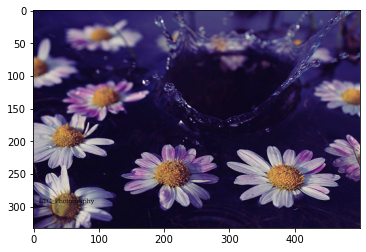

In [ ]:
img, label = dataset[3]  #check below code 
plt.imshow(img)

In [ ]:
import torchvision.transforms as tt
dataset=ImageFolder(data_dir,tt.Compose([tt.Resize(224),
                                         tt.RandomCrop(224),
                                         tt.ToTensor()]))

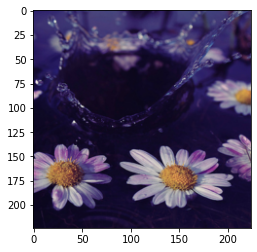

In [ ]:
img, label = dataset[3]
plt.imshow(img.permute((1,2,0)))

In [ ]:
 #val_pct-->Validation percentage
val_pct = 0.1
val_size = int(val_pct * len(dataset))
train_size = len(dataset) - val_size

train_size, val_size

(3886, 431)

In [ ]:
from torch.utils.data import random_split

train_ds, valid_ds = random_split(dataset, [train_size,val_size])

len(train_ds), len(valid_ds)

(3886, 431)

In [ ]:
from torch.utils.data import DataLoader

batch_size=256

train_dl = DataLoader(train_ds,
                      batch_size,
                      shuffle=True,
                      num_workers=4,
                      pin_memory=True)

valid_dl = DataLoader(valid_ds,
                    batch_size,
                    num_workers=4,
                    pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl:
    fig,ax = plt.subplots(figsize=(12, 6))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break
   

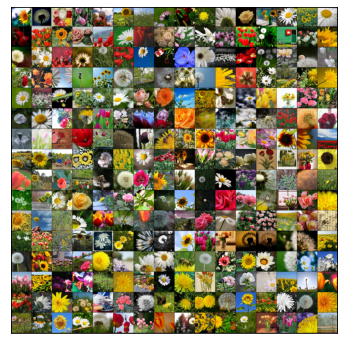

In [ ]:
show_batch(train_dl)

## GPU Utility 

In [ ]:
import torch

def get_default_device():
  """pick GPU if available , else CPU"""
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
  """Wrap a dataloader to move data to a device """
  def __init__(self , dl , device):
    self.dl = dl
    self.device=device
  
  def __iter__(self):
    """Yield a batch of data after moving it to device """
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    """Number of batches """
    return len(self.dl)




In [ ]:

torch.cuda.is_available()

True

In [ ]:
device = get_default_device()

In [ ]:
device

device(type='cuda')

In [ ]:
img, label=dataset[0]

In [ ]:
img

tensor([[[0.6039, 0.6118, 0.6157,  ..., 0.6706, 0.6588, 0.6549],
         [0.6706, 0.6745, 0.6784,  ..., 0.6588, 0.6549, 0.6510],
         [0.6510, 0.6549, 0.6549,  ..., 0.6549, 0.6510, 0.6549],
         ...,
         [0.4627, 0.4784, 0.4824,  ..., 0.5255, 0.5137, 0.5059],
         [0.4627, 0.4784, 0.4824,  ..., 0.5294, 0.5216, 0.5137],
         [0.4588, 0.4784, 0.4863,  ..., 0.5333, 0.5255, 0.5216]],

        [[0.6078, 0.6157, 0.6196,  ..., 0.6745, 0.6627, 0.6588],
         [0.6745, 0.6784, 0.6824,  ..., 0.6627, 0.6588, 0.6549],
         [0.6510, 0.6588, 0.6588,  ..., 0.6588, 0.6549, 0.6588],
         ...,
         [0.4471, 0.4627, 0.4667,  ..., 0.5176, 0.5059, 0.5020],
         [0.4471, 0.4627, 0.4667,  ..., 0.5216, 0.5137, 0.5098],
         [0.4431, 0.4627, 0.4706,  ..., 0.5255, 0.5176, 0.5176]],

        [[0.6275, 0.6353, 0.6392,  ..., 0.6824, 0.6706, 0.6667],
         [0.6980, 0.6980, 0.7020,  ..., 0.6706, 0.6667, 0.6627],
         [0.6824, 0.6824, 0.6784,  ..., 0.6667, 0.6627, 0.

In [ ]:
img.device


device(type='cpu')

In [ ]:
img_gpu = to_device(img, device)  #For me it's not running properly
img_gpu.device

device(type='cuda', index=0)

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl,device)

## Model and Training Utilities

In [1]:
import torch.nn as nn

class ImageClassificationBase(nn.Module):
 
  def training_step(self, batch):
    "Calculate loss for a batch of training data"
    images, labels=batch
    out = self(images)                  #Generate predictions
    loss = F.cross_entropy(out, labels) #Calculate loss
    return loss

  def validation_step(self, batch):
    "Calculate loss & accuracy for a batch of validation data"
    images, labels=batch
    out = self(images)                  #Generate Predictions
    loss = F.cross_entropy(out,labels)  #Calculate loss
    acc = accuracy(out , labels)          #Caluclate accuracy
    return {'val_loss': loss.detach(), 'val_acc':acc}


  def validation_epoch_end(self, outputs):
    batch_losses = [x[ 'val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()  #combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc=torch.stack(batch_accs).mean()       #Combine accuracies
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self,epoch, result):
    print("Epoch [{}], train_loss: {:.4f}, val_loss:{:.4f}, val_acc:{:.4f}".
          format(epoch, result['train_loss'],result['val_loss'],result['val_acc']))
    
  def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item()/len(preds))



In [2]:
@torch.no_grad()
def evauate(model, val_loader):
  outputs = []

SyntaxError: ignored